In [28]:
import warnings
import pandas as pd
import numpy as np
    
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

# Fast compile option: if the GOGREEN class has already been compiled and there has 
# been no change made to the catalog, uncomment the second line before running
priorCatalog = pd.DataFrame()
priorCatalog = gg.catalog

with warnings.catch_warnings(): #suppressing depracation warnings for the import and instantion process for readability purposes
    warnings.simplefilter("ignore")
    warnings.warn("deprecated", DeprecationWarning)

    # Import
    %run "C:/Users/panda/Documents/Github/GOGREEN-Research/Code/GOGREEN.py"

    # Instantiate
    gg = GOGREEN( 'C:/Users/panda/Desktop/GOGREEN_Working/', priorCatalog=priorCatalog)
    
    #print(gg.catalog.columns.to_list())

In [29]:
# Establish criteria ( run before calling plot() )

searchCriteria = [
            'Star == 0',
            'K_flag < 4',
            'Mstellar > 10**9.8',
            '(1 < zspec < 1.5) or ((((Redshift_Quality != 3) and (Redshift_Quality != 4)) or (SPECID < 0)) and (1 < zphot < 1.5))',
            'cluster_id <= 12',
            'totmask == 0',
            'Fit_flag > 2',
            'n < 6',
            'HSTFOV_flag == 1',
            're > 0'
]
gg.standardCriteria = searchCriteria

In [4]:
gg.setGoodData(["member_adjusted == 1"], True)

transitionTypes = ['starForming', 'passive', 'greenValley', 'blueQuiescent', 'postStarBurst']
for i in range(0,5):
    for j in range(i,5):
        if i == j:
            print(transitionTypes[i] + ": " + str(gg.catalog[(gg.catalog['goodData'] == 1) & (gg.catalog[transitionTypes[i]] == 1)].shape[0]))
        else:
            print(transitionTypes[i] + " and " + transitionTypes[j] + ": " + str(gg.catalog[(gg.catalog['goodData'] == 1) & (gg.catalog[transitionTypes[i]] == 1) & (gg.catalog[transitionTypes[j]] == 1)].shape[0]))

starForming: 128
starForming and passive: 0
starForming and greenValley: 0
starForming and blueQuiescent: 5
starForming and postStarBurst: 1
passive: 239
passive and greenValley: 0
passive and blueQuiescent: 24
passive and postStarBurst: 15
greenValley: 53
greenValley and blueQuiescent: 8
greenValley and postStarBurst: 1
blueQuiescent: 37
blueQuiescent and postStarBurst: 7
postStarBurst: 17


In [5]:
gg.setGoodData(["nonmember_adjusted == 1"], True)

transitionTypes = ['starForming', 'passive', 'greenValley', 'blueQuiescent', 'postStarBurst']
for i in range(0,5):
    for j in range(i,5):
        if i == j:
            print(transitionTypes[i] + ": " + str(gg.catalog[(gg.catalog['goodData'] == 1) & (gg.catalog[transitionTypes[i]] == 1)].shape[0]))
        else:
            print(transitionTypes[i] + " and " + transitionTypes[j] + ": " + str(gg.catalog[(gg.catalog['goodData'] == 1) & (gg.catalog[transitionTypes[i]] == 1) & (gg.catalog[transitionTypes[j]] == 1)].shape[0]))

starForming: 106
starForming and passive: 0
starForming and greenValley: 0
starForming and blueQuiescent: 9
starForming and postStarBurst: 1
passive: 66
passive and greenValley: 0
passive and blueQuiescent: 13
passive and postStarBurst: 6
greenValley: 20
greenValley and blueQuiescent: 3
greenValley and postStarBurst: 0
blueQuiescent: 25
blueQuiescent and postStarBurst: 3
postStarBurst: 7


Quiescent count: 239
Star Forming count: 128
Green Valley count: 53


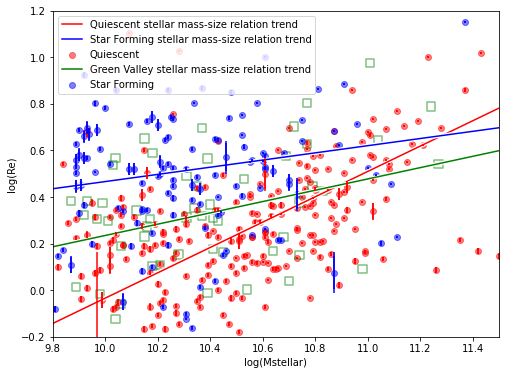

In [9]:
with warnings.catch_warnings(): #suppressing depracation warnings for readability purposes
    warnings.simplefilter("ignore")
    warnings.warn("deprecated", DeprecationWarning)
    
    gg.plot('Mstellar', 're_converted', 3, useMembers='only', useLog=[True,True], colorType='passive', xLabel='log(Mstellar)', yLabel='log(Re)', xRange=[9.8,11.5], yRange=[-0.2,1.2], fitLine=True, bootstrap=False, plotErrBars=True, plotTransitionType='GV')

Quiescent count: 239
Star Forming count: 128
Blue Quiescent count: 37


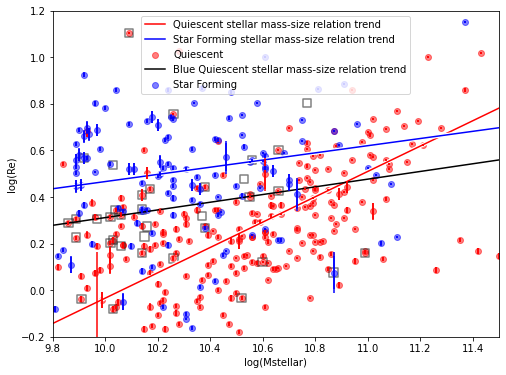

In [10]:
with warnings.catch_warnings(): #suppressing depracation warnings for readability purposes
    warnings.simplefilter("ignore")
    warnings.warn("deprecated", DeprecationWarning)
    
    gg.plot('Mstellar', 're_converted', 3, useMembers='only', useLog=[True,True], colorType='passive', xLabel='log(Mstellar)', yLabel='log(Re)', xRange=[9.8,11.5], yRange=[-0.2,1.2], fitLine=True, bootstrap=False, plotErrBars=True, plotTransitionType='BQ')

Quiescent count: 239
Star Forming count: 128
Post-starburst count: 17


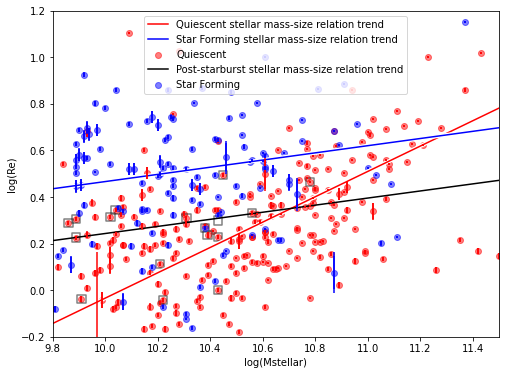

In [11]:
with warnings.catch_warnings(): #suppressing depracation warnings for readability purposes
    warnings.simplefilter("ignore")
    warnings.warn("deprecated", DeprecationWarning)
    
    gg.plot('Mstellar', 're_converted', 3, useMembers='only', useLog=[True,True], colorType='passive', xLabel='log(Mstellar)', yLabel='log(Re)', xRange=[9.8,11.5], yRange=[-0.2,1.2], fitLine=True, bootstrap=False, plotErrBars=True, plotTransitionType='PSB')

Quiescent count: 66
Star Forming count: 106


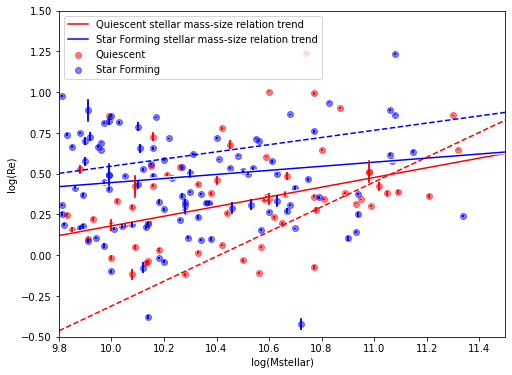

In [12]:
with warnings.catch_warnings(): #suppressing depracation warnings for readability purposes
    warnings.simplefilter("ignore")
    warnings.warn("deprecated", DeprecationWarning)
    
    gg.plot('Mstellar', 're_converted', 3, useMembers='not', useLog=[True,True], colorType='passive', xLabel='log(Mstellar)', yLabel='log(Re)', xRange=[9.8,11.5], yRange=[-0.5,1.5], fitLine=True, bootstrap=False, plotErrBars=True)

Quiescent cluster count: 239
Star-Forming cluster count: 128
Quiescent field count: 66
Star-Forming field count: 106
(0.7236260952194101, 1.069041820912672)


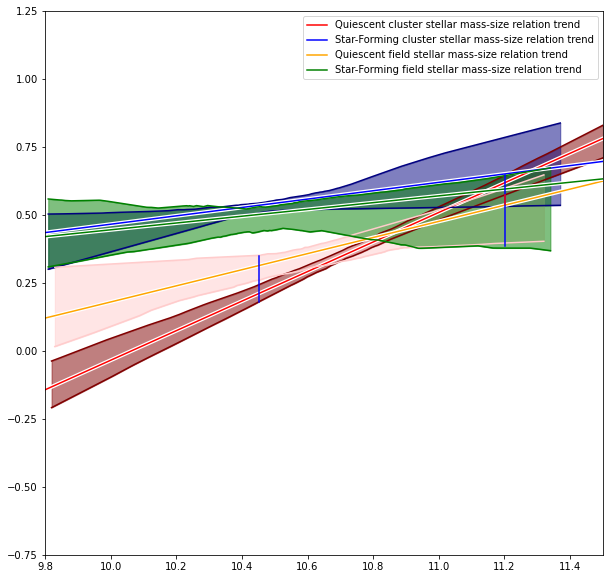

In [30]:
with warnings.catch_warnings(): #suppressing depracation warnings for readability purposes
    warnings.simplefilter("ignore")
    warnings.warn("deprecated", DeprecationWarning)
    
    ratio = gg.compTrends(x=10.5)
    print(ratio) # first value is quiescent ratio, second is sf

Quiescent cluster count: 239
Star-Forming cluster count: 128
Quiescent field count: 66
Star-Forming field count: 106
GV cluster count: 53
GV field count: 20
BQ cluster count: 37
BQ field count: 25
PSB cluster count: 17


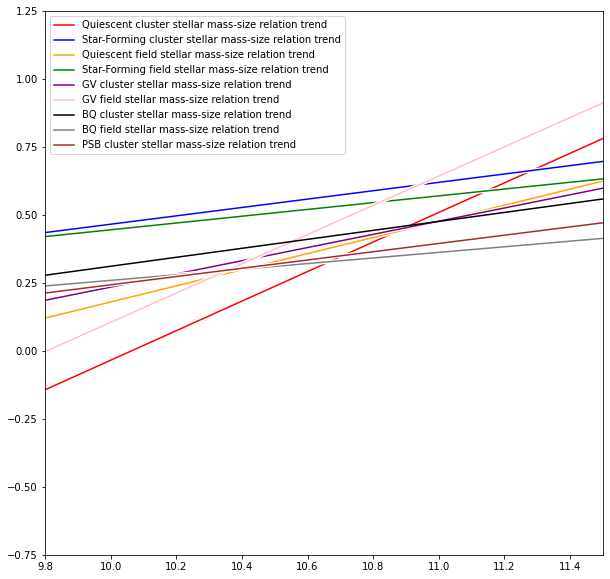

In [7]:
with warnings.catch_warnings(): #suppressing depracation warnings for readability purposes
    warnings.simplefilter("ignore")
    warnings.warn("deprecated", DeprecationWarning)
    
    gg.compTrends(x=10.5, plotType="transition", bootstrap=False)

cluster count: 420
field count: 192
0.8399170248563219


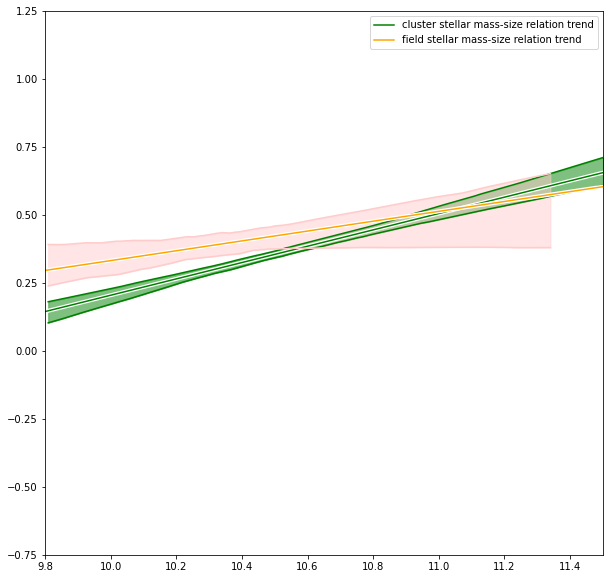

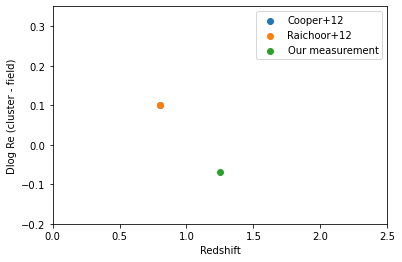

In [8]:
with warnings.catch_warnings(): #suppressing depracation warnings for readability purposes
    warnings.simplefilter("ignore")
    warnings.warn("deprecated", DeprecationWarning)
    
    ratio = gg.compTrends(x=10.5, plotType="lit")
    print(ratio[0])

Cluster count: 420
Field count: 192


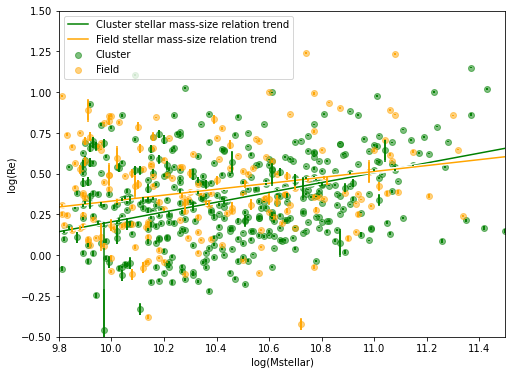

In [43]:
with warnings.catch_warnings(): #suppressing depracation warnings for readability purposes
    warnings.simplefilter("ignore")
    warnings.warn("deprecated", DeprecationWarning)
    
    gg.plot('Mstellar', 're_converted', 3, useLog=[True,True], colorType='environment', xLabel='log(Mstellar)', yLabel='log(Re)', xRange=[9.8,11.5], yRange=[-0.5,1.5], fitLine=True, bootstrap=False, plotErrBars=True)

Cluster (Quiescent) count: 239
Field (Quiescent) count: 66


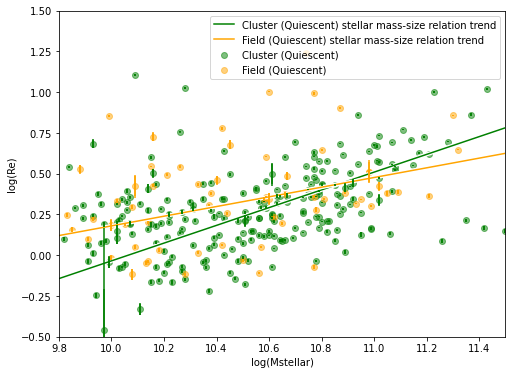

In [46]:
with warnings.catch_warnings(): #suppressing depracation warnings for readability purposes
    warnings.simplefilter("ignore")
    warnings.warn("deprecated", DeprecationWarning)
    
    gg.plot('Mstellar', 're_converted', 3, useLog=[True,True], colorType='environmentQ', xLabel='log(Mstellar)', yLabel='log(Re)', xRange=[9.8,11.5], yRange=[-0.5,1.5], fitLine=True, bootstrap=False, plotErrBars=True)

Cluster (Star-forming) count: 128
Field (Star-forming) count: 106


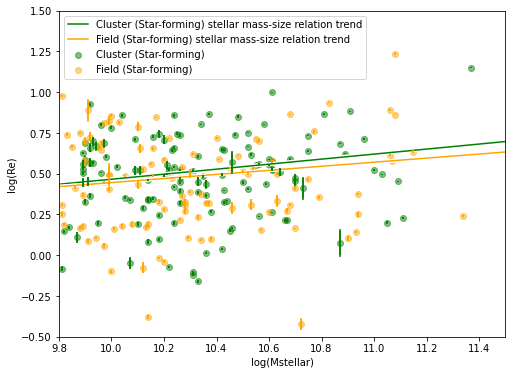

In [48]:
with warnings.catch_warnings(): #suppressing depracation warnings for readability purposes
    warnings.simplefilter("ignore")
    warnings.warn("deprecated", DeprecationWarning)
    
    gg.plot('Mstellar', 're_converted', 3, useLog=[True,True], colorType='environmentSF', xLabel='log(Mstellar)', yLabel='log(Re)', xRange=[9.8,11.5], yRange=[-0.5,1.5], fitLine=True, bootstrap=False, plotErrBars=True)

Spectroscopic z count: 269
Photometric z count: 343


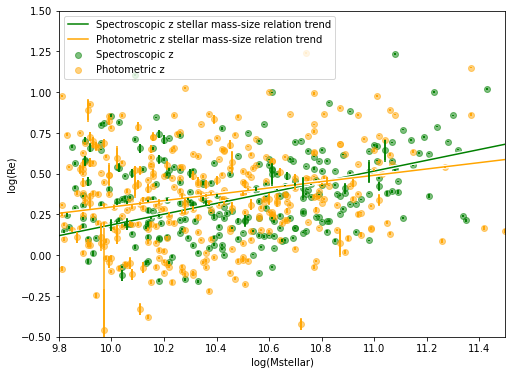

In [5]:
with warnings.catch_warnings(): #suppressing depracation warnings for readability purposes
    warnings.simplefilter("ignore")
    warnings.warn("deprecated", DeprecationWarning)
    
    gg.plot('Mstellar', 're_converted', 3, useLog=[True,True], colorType='catalog', xLabel='log(Mstellar)', yLabel='log(Re)', xRange=[9.8,11.5], yRange=[-0.5,1.5], fitLine=True, bootstrap=False, plotErrBars=True)

Elliptical count: 236
Spiral count: 376


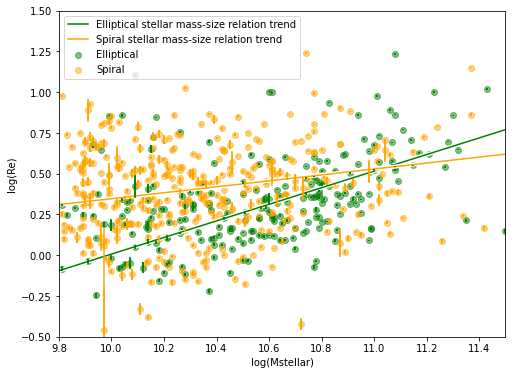

In [6]:
with warnings.catch_warnings(): #suppressing depracation warnings for readability purposes
    warnings.simplefilter("ignore")
    warnings.warn("deprecated", DeprecationWarning)
    
    gg.plot('Mstellar', 're_converted', 3, useLog=[True,True], colorType='sersic', xLabel='log(Mstellar)', yLabel='log(Re)', xRange=[9.8,11.5], yRange=[-0.5,1.5], fitLine=True, bootstrap=False, plotErrBars=True)

Quiescent count: 305
Star Forming count: 234


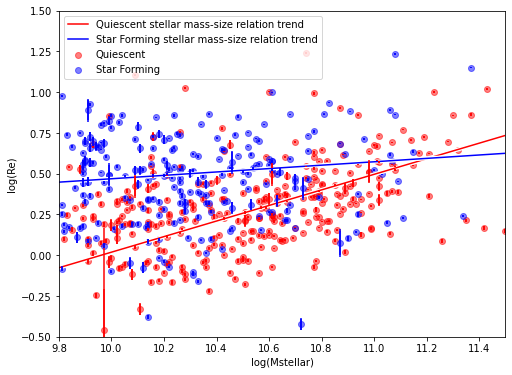

In [7]:
with warnings.catch_warnings(): #suppressing depracation warnings for readability purposes
    warnings.simplefilter("ignore")
    warnings.warn("deprecated", DeprecationWarning)
    
    gg.plot('Mstellar', 're_converted', 3, useLog=[True,True], colorType='passive', xLabel='log(Mstellar)', yLabel='log(Re)', xRange=[9.8,11.5], yRange=[-0.5,1.5], fitLine=True, bootstrap=False, plotErrBars=True)

<Figure size 576x432 with 0 Axes>

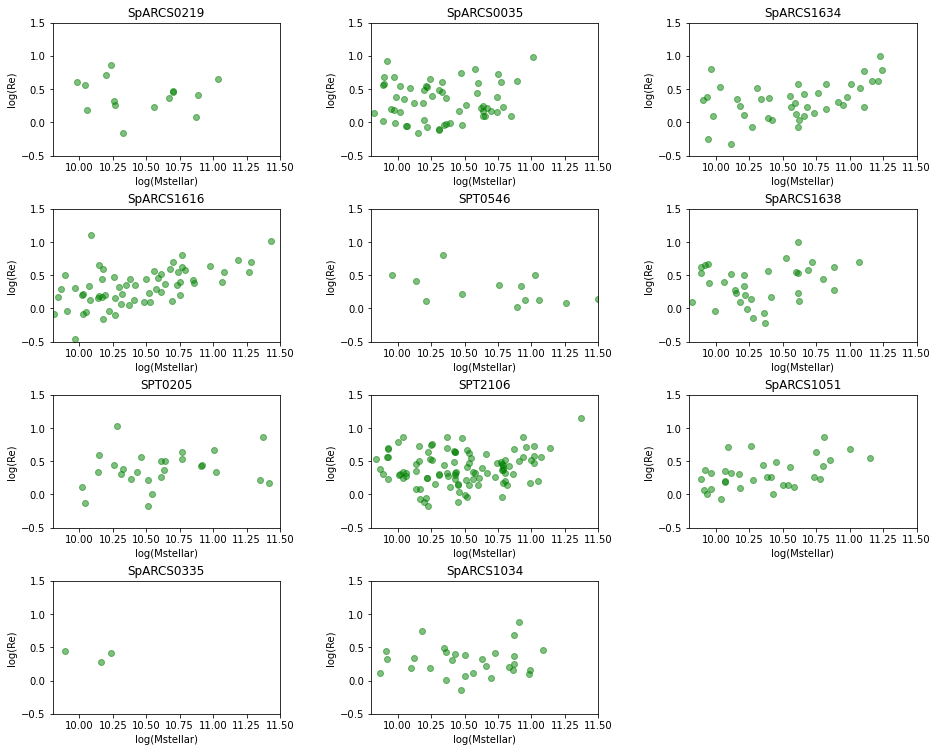

In [3]:
with warnings.catch_warnings(): #suppressing depracation warnings for readability purposes
    warnings.simplefilter("ignore")
    warnings.warn("deprecated", DeprecationWarning)
    
    gg.plot('Mstellar', 're_converted', 2, useMembers="only", useLog=[True,True], xLabel='log(Mstellar)', yLabel='log(Re)', xRange=[9.8,11.5], yRange=[-0.5,1.5])